<a href="https://colab.research.google.com/github/jeqcho/reproduce-faculty-gender-ratings/blob/main/qguide_gender_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("qguide_data.csv")
data['male'] = np.where(data['Boy or Girl?'] == 'Boy', 1, 0)
df = data[['lecturer_score_mean', 'department','male','Probability']]
df

      lecturer_score_mean                      department  male  Probability
0                    5.00                             NaN     1         0.75
1                    5.00                             NaN     1         0.94
2                    4.25  African & African Amer Studies     1         0.51
3                    4.48  African & African Amer Studies     0         0.99
4                    4.75                             NaN     1         0.91
...                   ...                             ...   ...          ...
1257                  NaN  Slavic Languages & Literatures     0          NaN
1258                  NaN                       Sociology     0          NaN
1259                  NaN                      Statistics     0          NaN
1260                  NaN   Stem Cell & Regenerative Biol     0          NaN
1261                  NaN   Stem Cell & Regenerative Biol     0          NaN

[1262 rows x 4 columns]


In [ ]:
# Filter out rows with string "NaN" value
df = df[~df.astype(str).eq('NaN').any(axis=1)]
df.describe()

,lecturer_score_mean,male,Probability
count,1238.000000,1262.000000,1238.000000
mean,4.551276,0.610935,0.793183
std,0.505493,0.487731,0.138276
min,2.000000,0.000000,0.500000
25%,4.370000,0.000000,0.700000
50%,4.700000,1.000000,0.830000
75%,4.920000,1.000000,0.910000
max,5.000000,1.000000,0.990000


In [ ]:
na_counts = df.isna().sum()
na_counts

lecturer_score_mean     24
department             474
male                     0
Probability             24
dtype: int64

In [ ]:
df = df.dropna()
df

,lecturer_score_mean,department,male,Probability
2,4.25,African & African Amer Studies,1,0.51
3,4.48,African & African Amer Studies,0,0.99
8,4.27,African & African Amer Studies,1,0.63
10,3.50,African & African Amer Studies,1,0.83
11,3.00,African & African Amer Studies,1,0.83
...,...,...,...,...
1226,5.00,"Theater, Dance & Media",1,0.55
1231,4.43,"Women, Gender & Sexuality",1,0.85
1232,5.00,"Women, Gender & Sexuality",0,0.81
1234,4.76,"Women, Gender & Sexuality",0,0.64


In [ ]:
df.dtypes

lecturer_score_mean    float64
department              object
male                     int64
Probability            float64
dtype: object

In [ ]:
department_names = df['department'].unique().tolist()
department_names

['African & African Amer Studies',
 'Anthropology',
 'Applied Computation',
 'Applied Mathematics',
 'Applied Physics',
 'Art, Film, and Visual Studies',
 'Astronomy',
 'Bio Sciences in Public Health',
 'Biomedical Engineering',
 'Biophysics',
 'Biostatistics',
 'Chemical Biology',
 'Chemical & Physical Biology',
 'Chemistry & Chemical Biology',
 'Classics, The',
 'Comparative Literature',
 'Computer Science',
 'Earth & Planetary Sciences',
 'East Asian Langs & Civ',
 'Economics',
 'Education Studies',
 'Engineering Sciences',
 'English',
 'Environmental Sci & Engineer',
 'Envi Science & Public Policy',
 'Ethnicity, Migration, Rights',
 'Expository Writing',
 'Folklore & Mythology',
 'Freshman Seminars',
 'General Education',
 'Germanic Languages & Lit',
 'Global Health & Health Policy',
 'Government',
 'Health Policy',
 'History',
 'History & Literature',
 'History of Art & Architecture',
 'History of Science',
 'Human Evolutionary Biology',
 'Humanities',
 'Linguistics',
 'Mathematic

In [ ]:
df_male = df[df["male"] == 1]
df_female = df[df["male"] == 0]

department_df = pd.DataFrame()
department_df['department'] = department_names
department_df['num_total'] = [len(df[df['department']==x]) for x in department_names]
department_df['num_males'] = [len(df[(df['department']==x)&(df['male']==1)]) for x in department_names]
department_df['num_females'] = department_df['num_total']-department_df['num_males']
department_df['m_f'] = (department_df['num_males']-department_df['num_females']) /department_df['num_total']
department_df['m_score'] = [df_male[df_male["department"]==x]['lecturer_score_mean'].mean() for x in department_names]
department_df['f_score'] = [df_female[df_female["department"]==x]['lecturer_score_mean'].mean() for x in department_names]
department_df['m_f_score'] = department_df['m_score']-department_df['f_score']
department_df

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
0,African & African Amer Studies,10,7,3,0.400000,4.074286,4.716667,-0.642381
1,Anthropology,10,2,8,-0.600000,4.750000,4.816250,-0.066250
2,Applied Computation,4,4,0,1.000000,4.430000,NaN,NaN
3,Applied Mathematics,7,3,4,-0.142857,4.360000,4.107500,0.252500
4,Applied Physics,6,4,2,0.333333,4.655000,3.750000,0.905000
...,...,...,...,...,...,...,...,...
59,South Asian Studies,3,2,1,0.333333,4.945000,5.000000,-0.055000
60,Statistics,14,6,8,-0.142857,4.365000,4.630000,-0.265000
61,Stem Cell & Regenerative Biol,8,3,5,-0.250000,4.086667,4.310000,-0.223333
62,"Theater, Dance & Media",7,4,3,0.142857,4.917500,4.756667,0.160833


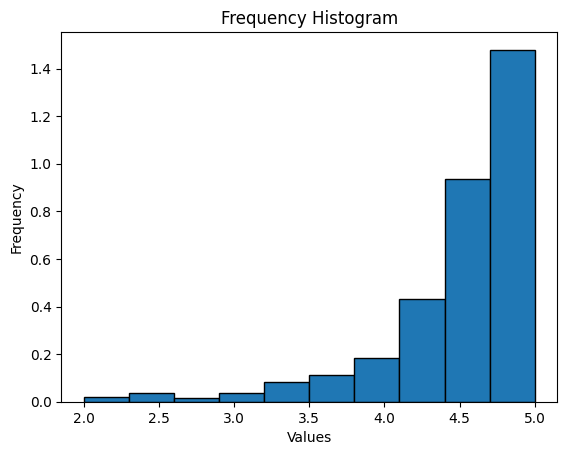

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create a histogram with bins and edgecolor specified
ax.hist(df_male["lecturer_score_mean"], bins=10, edgecolor='black', density=True)

# Add labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Histogram')

# Display the plot
plt.show()

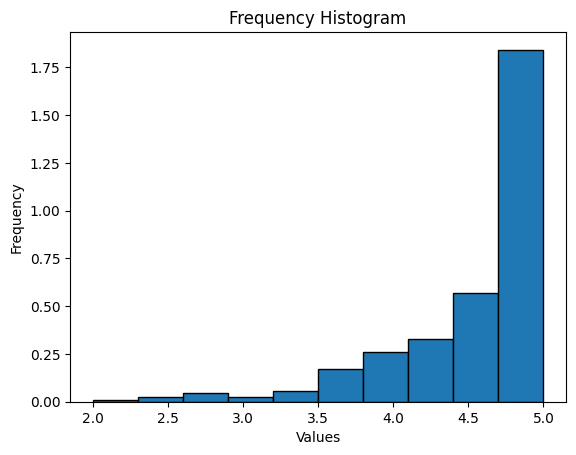

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create a histogram with bins and edgecolor specified
ax.hist(df_female["lecturer_score_mean"], bins=10, edgecolor='black', density=True)

# Add labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Histogram')

# Display the plot
plt.show()

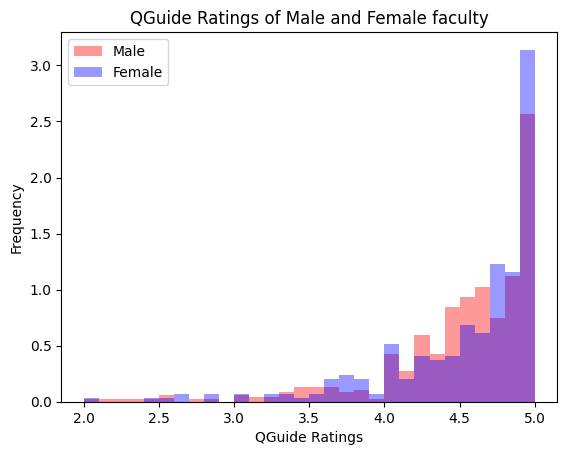

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the histograms
ax.hist(df_male["lecturer_score_mean"], bins=30, alpha=0.4, label='Male',density=True, color='red')
ax.hist(df_female["lecturer_score_mean"], bins=30, alpha=0.4, label='Female',density=True, color='blue')

# Add legend
ax.legend()

# Set axis labels and title
ax.set_xlabel('QGuide Ratings')
ax.set_ylabel('Frequency')
ax.set_title('QGuide Ratings of Male and Female faculty')

# Show the plot
plt.show()

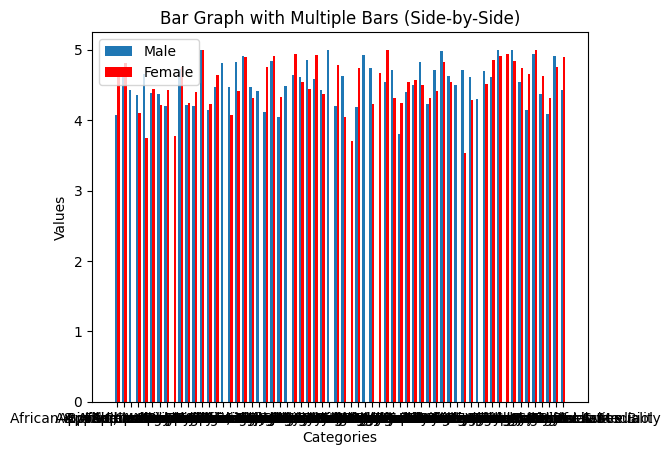

In [ ]:
import matplotlib.pylab as plt
# Extract data from dictionaries
categories = department_names
values1 = list(department_df["m_score"])
values2 = list(department_df["f_score"])

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis using NumPy
ind = np.arange(len(categories))

# Create the figure and axes
fig, ax = plt.subplots()

# Create the first set of bars
ax.bar(ind, values1, bar_width, label='Male')

# Create the second set of bars next to the first set
ax.bar(ind + bar_width, values2, bar_width, label='Female',color='red')

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Graph with Multiple Bars (Side-by-Side)')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()

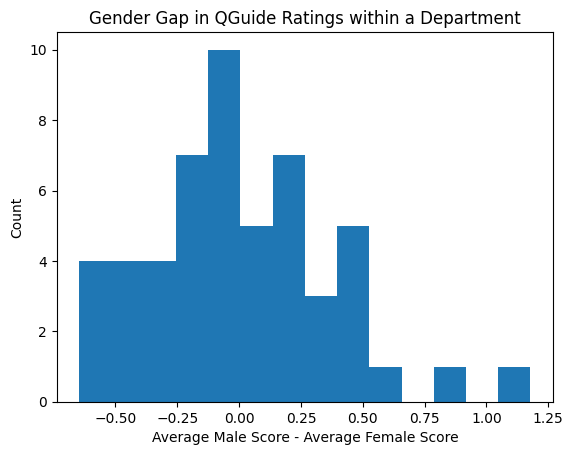

In [ ]:
values = list(department_df['m_f_score'])
# Create the figure and axes
fig, ax = plt.subplots()

# Plot the list of values on the y-axis
ax.hist(values,bins=14)

# Add labels and title
ax.set_xlabel('Average Male Score - Average Female Score')
ax.set_ylabel('Count')
ax.set_title('Gender Gap in QGuide Ratings within a Department')

# Display the plot
plt.show()

In [ ]:
department_df.sort_values('m_f_score', ascending=True)

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
21,Engineering Sciences,30,19,11,0.266667,4.111579,4.757273,-0.645694
0,African & African Amer Studies,10,7,3,0.400000,4.074286,4.716667,-0.642381
31,Global Health & Health Policy,5,4,1,0.600000,4.207500,4.780000,-0.572500
34,History,5,2,3,-0.200000,4.190000,4.743333,-0.553333
58,Sociology,6,2,4,-0.333333,4.150000,4.650000,-0.500000
...,...,...,...,...,...,...,...,...
35,History & Literature,1,1,0,1.000000,4.930000,NaN,NaN
37,History of Science,5,0,5,-1.000000,NaN,4.670000,NaN
48,Organismic & Evolutionary Biol,6,6,0,1.000000,4.498333,NaN,NaN
51,Population Health Sciences,3,3,0,1.000000,4.296667,NaN,NaN


In [ ]:
department_df.sort_values('m_f_score', ascending=False)

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
49,Philosophy,6,4,2,0.333333,4.712500,3.535000,1.177500
4,Applied Physics,6,4,2,0.333333,4.655000,3.750000,0.905000
32,Government,22,19,3,0.727273,4.633684,4.040000,0.593684
36,History of Art & Architecture,12,6,6,0.000000,4.741667,4.223333,0.518333
27,Folklore & Mythology,2,1,1,0.000000,4.860000,4.440000,0.420000
...,...,...,...,...,...,...,...,...
35,History & Literature,1,1,0,1.000000,4.930000,NaN,NaN
37,History of Science,5,0,5,-1.000000,NaN,4.670000,NaN
48,Organismic & Evolutionary Biol,6,6,0,1.000000,4.498333,NaN,NaN
51,Population Health Sciences,3,3,0,1.000000,4.296667,NaN,NaN


In [ ]:
department_df.reindex(department_df.m_f_score.abs().sort_values().index)

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
12,Chemical & Physical Biology,3,2,1,0.333333,5.000000,5.000000,0.000000
9,Biophysics,6,4,2,0.333333,4.732500,4.750000,-0.017500
18,East Asian Langs & Civ,36,23,13,0.277778,4.913913,4.896154,0.017759
10,Biostatistics,9,6,3,0.333333,4.220000,4.250000,-0.030000
5,"Art, Film, and Visual Studies",10,7,3,0.400000,4.387143,4.436667,-0.049524
...,...,...,...,...,...,...,...,...
35,History & Literature,1,1,0,1.000000,4.930000,NaN,NaN
37,History of Science,5,0,5,-1.000000,NaN,4.670000,NaN
48,Organismic & Evolutionary Biol,6,6,0,1.000000,4.498333,NaN,NaN
51,Population Health Sciences,3,3,0,1.000000,4.296667,NaN,NaN


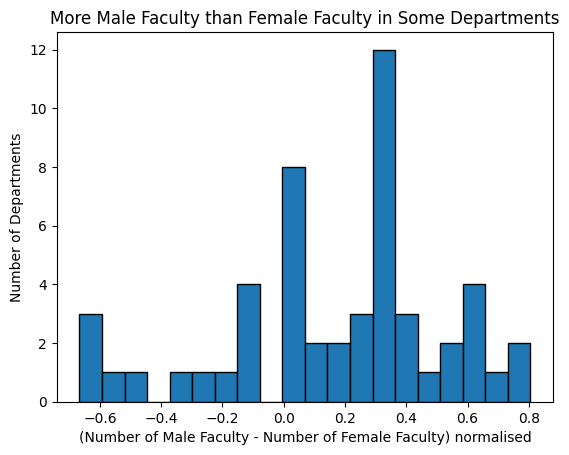

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes
fig, ax = plt.subplots()
# Replace infinite values with NaN
df2 = department_df.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
df2.dropna(inplace=True)

# Create a histogram with bins and edgecolor specified
ax.hist(df2['m_f'], bins=20, edgecolor='black')

# Add labels and title
ax.set_xlabel('(Number of Male Faculty - Number of Female Faculty) normalised')
ax.set_ylabel('Number of Departments')
ax.set_title('More Male Faculty than Female Faculty in Some Departments')

# Display the plot
plt.show()

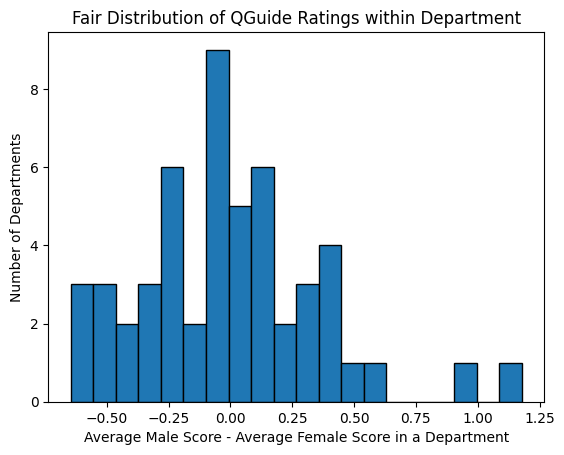

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes
fig, ax = plt.subplots()
# Replace infinite values with NaN
df2 = department_df.replace([np.inf, -np.inf], np.nan)
# Create a histogram with bins and edgecolor specified
ax.hist(df2['m_f_score'], bins=20, edgecolor='black')

# Add labels and title
ax.set_xlabel('Average Male Score - Average Female Score in a Department')
ax.set_ylabel('Number of Departments')
ax.set_title('Fair Distribution of QGuide Ratings within Department')

# Display the plot
plt.show()

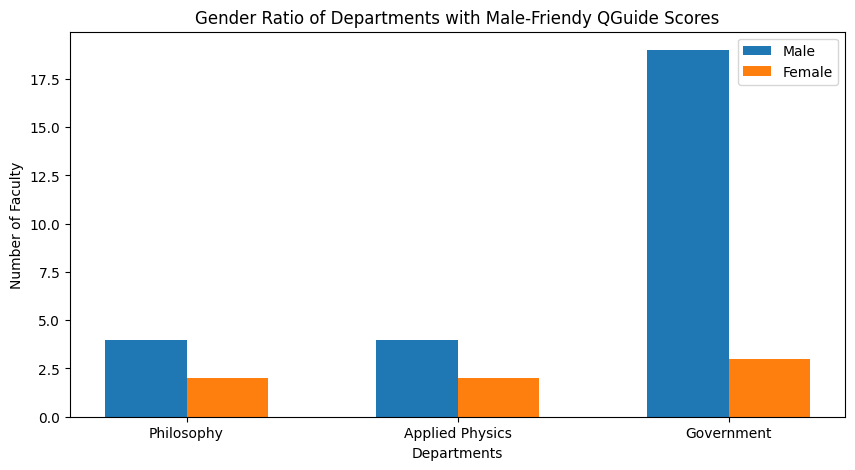

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three groups
group_names = ['Philosophy', 'Applied Physics', 'Government']
male_bars = (department_df[department_df['department']=='Philosophy'].iloc[0]['num_males'],
             department_df[department_df['department']=='Applied Physics'].iloc[0]['num_males'],
             department_df[department_df['department']=='Government'].iloc[0]['num_males'])


female_bars = [department_df[department_df['department']=='Philosophy'].iloc[0]['num_females'],
                 department_df[department_df['department']=='Applied Physics'].iloc[0]['num_females'],
                 department_df[department_df['department']=='Government'].iloc[0]['num_females']]

N=3
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, male_bars , width, label='Male')
plt.bar(ind + width, female_bars, width, label='Female')

plt.xlabel('Departments')
plt.ylabel('Number of Faculty')
plt.title('Gender Ratio of Departments with Male-Friendy QGuide Scores')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Philosophy', 'Applied Physics', 'Government'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

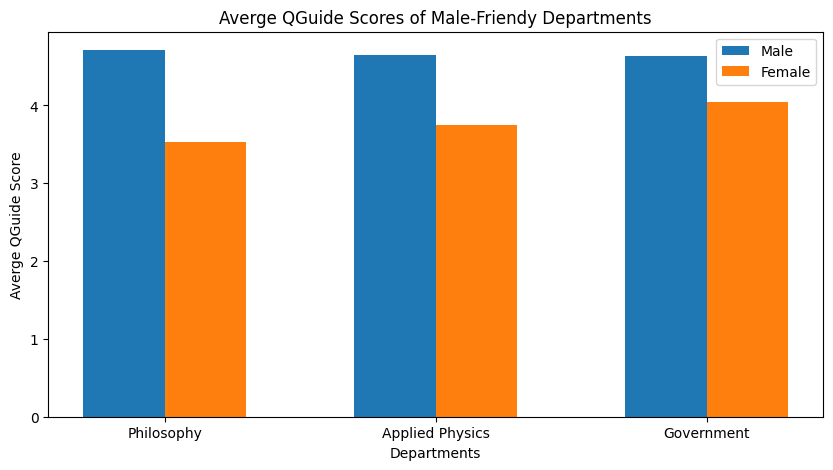

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three groups
group_names = ['Philosophy', 'Applied Physics', 'Government']
male_bars = (department_df[department_df['department']=='Philosophy'].iloc[0]['m_score'],
             department_df[department_df['department']=='Applied Physics'].iloc[0]['m_score'],
             department_df[department_df['department']=='Government'].iloc[0]['m_score'])


female_bars = [department_df[department_df['department']=='Philosophy'].iloc[0]['f_score'],
                 department_df[department_df['department']=='Applied Physics'].iloc[0]['f_score'],
                 department_df[department_df['department']=='Government'].iloc[0]['f_score']]

N=3
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, male_bars , width, label='Male')
plt.bar(ind + width, female_bars, width, label='Female')

plt.xlabel('Departments')
plt.ylabel('Averge QGuide Score')
plt.title('Averge QGuide Scores of Male-Friendy Departments')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Philosophy', 'Applied Physics', 'Government'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

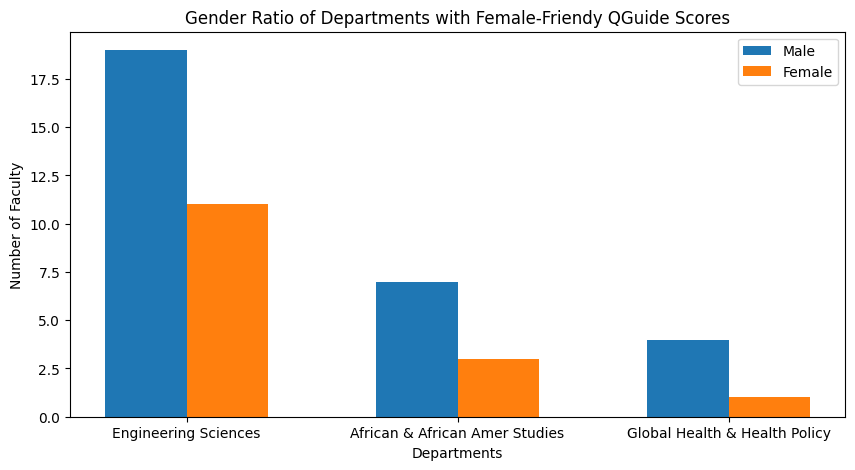

In [ ]:
# Define the data for the three groups
group_names = ['Engineering Sciences', 'African & African Amer Studies', 'Global Health & Health Policy']
male_bars = (department_df[department_df['department']=='Engineering Sciences'].iloc[0]['num_males'],
             department_df[department_df['department']=='African & African Amer Studies'].iloc[0]['num_males'],
             department_df[department_df['department']=='Global Health & Health Policy'].iloc[0]['num_males'])


female_bars = [department_df[department_df['department']=='Engineering Sciences'].iloc[0]['num_females'],
                 department_df[department_df['department']=='African & African Amer Studies'].iloc[0]['num_females'],
                 department_df[department_df['department']=='Global Health & Health Policy'].iloc[0]['num_females']]

N=3
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, male_bars , width, label='Male')
plt.bar(ind + width, female_bars, width, label='Female')

plt.xlabel('Departments')
plt.ylabel('Number of Faculty')
plt.title('Gender Ratio of Departments with Female-Friendy QGuide Scores')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Engineering Sciences', 'African & African Amer Studies', 'Global Health & Health Policy'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

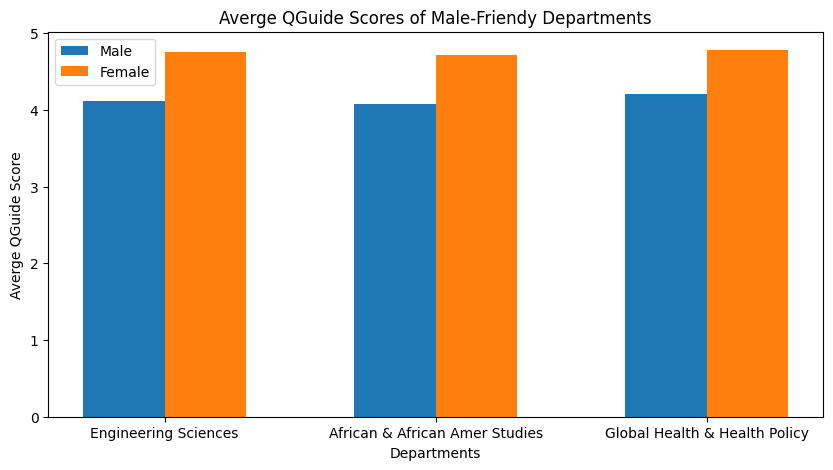

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three groups
group_names = ['Engineering Sciences', 'African & African Amer Studies', 'Global Health & Health Policy']
male_bars = (department_df[department_df['department']=='Engineering Sciences'].iloc[0]['m_score'],
             department_df[department_df['department']=='African & African Amer Studies'].iloc[0]['m_score'],
             department_df[department_df['department']=='Global Health & Health Policy'].iloc[0]['m_score'])


female_bars = [department_df[department_df['department']=='Engineering Sciences'].iloc[0]['f_score'],
                 department_df[department_df['department']=='African & African Amer Studies'].iloc[0]['f_score'],
                 department_df[department_df['department']=='Global Health & Health Policy'].iloc[0]['f_score']]

N=3
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, male_bars , width, label='Male')
plt.bar(ind + width, female_bars, width, label='Female')

plt.xlabel('Departments')
plt.ylabel('Averge QGuide Score')
plt.title('Averge QGuide Scores of Male-Friendy Departments')
# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Engineering Sciences', 'African & African Amer Studies', 'Global Health & Health Policy'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

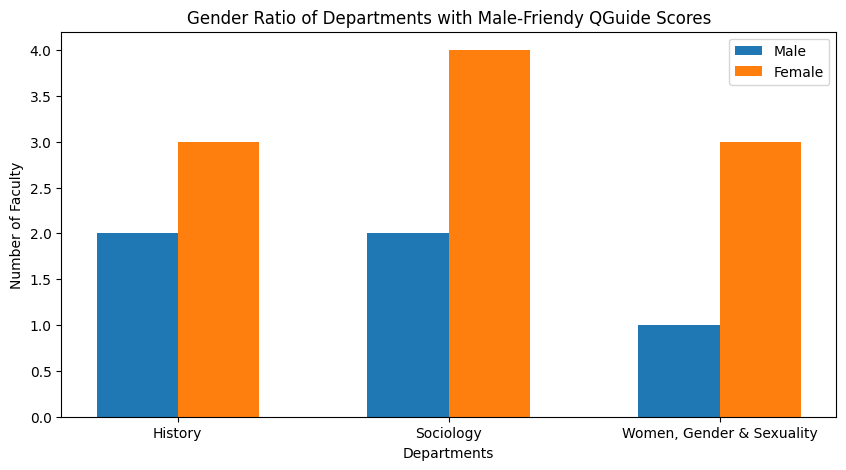

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three groups
group_names = ['History', 'Sociology', 'Women, Gender & Sexuality']
male_bars = (department_df[department_df['department']=='History'].iloc[0]['num_males'],
             department_df[department_df['department']=='Sociology'].iloc[0]['num_males'],
             department_df[department_df['department']=='Women, Gender & Sexuality'].iloc[0]['num_males'])


female_bars = [department_df[department_df['department']=='History'].iloc[0]['num_females'],
                 department_df[department_df['department']=='Sociology'].iloc[0]['num_females'],
                 department_df[department_df['department']=='Women, Gender & Sexuality'].iloc[0]['num_females']]

N=3
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, male_bars , width, label='Male')
plt.bar(ind + width, female_bars, width, label='Female')

plt.xlabel('Departments')
plt.ylabel('Number of Faculty')
plt.title('Gender Ratio of Departments with Male-Friendy QGuide Scores')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('History', 'Sociology', 'Women, Gender & Sexuality'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

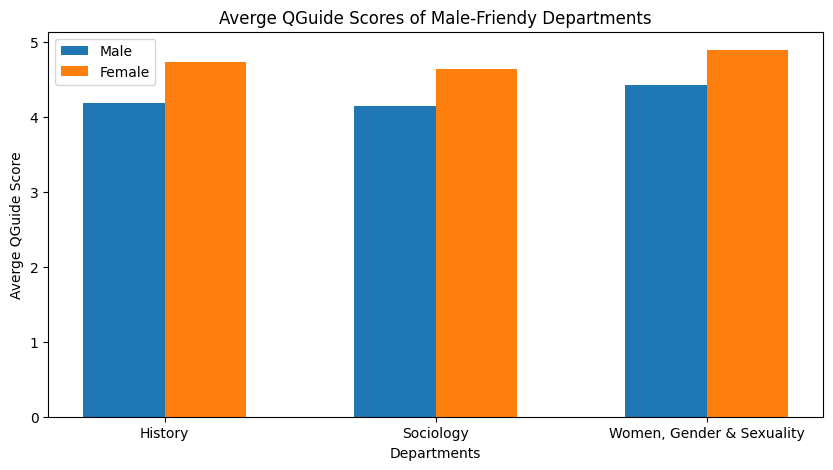

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three groups
group_names = ['History', 'Sociology', 'Women, Gender & Sexuality']
male_bars = (department_df[department_df['department']=='History'].iloc[0]['m_score'],
             department_df[department_df['department']=='Sociology'].iloc[0]['m_score'],
             department_df[department_df['department']=='Women, Gender & Sexuality'].iloc[0]['m_score'])


female_bars = [department_df[department_df['department']=='History'].iloc[0]['f_score'],
                 department_df[department_df['department']=='Sociology'].iloc[0]['f_score'],
                 department_df[department_df['department']=='Women, Gender & Sexuality'].iloc[0]['f_score']]

N=3
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, male_bars , width, label='Male')
plt.bar(ind + width, female_bars, width, label='Female')

plt.xlabel('Departments')
plt.ylabel('Averge QGuide Score')
plt.title('Averge QGuide Scores of Male-Friendy Departments')
# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('History', 'Sociology', 'Women, Gender & Sexuality'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
department_df.sort_values('m_f', ascending=True)

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
8,Biomedical Engineering,1,0,1,-1.000000,NaN,3.780,NaN
37,History of Science,5,0,5,-1.000000,NaN,4.670,NaN
33,Health Policy,1,0,1,-1.000000,NaN,3.710,NaN
55,"Russia, E Europe, Central Asia",2,0,2,-1.000000,NaN,4.940,NaN
14,"Classics, The",6,1,5,-0.666667,4.470000,4.644,-0.174
...,...,...,...,...,...,...,...,...
15,Comparative Literature,2,2,0,1.000000,4.810000,NaN,NaN
35,History & Literature,1,1,0,1.000000,4.930000,NaN,NaN
2,Applied Computation,4,4,0,1.000000,4.430000,NaN,NaN
51,Population Health Sciences,3,3,0,1.000000,4.296667,NaN,NaN


In [ ]:
department_df.sort_values('m_f', ascending=False)

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
20,Education Studies,2,2,0,1.000000,4.415000,NaN,NaN
35,History & Literature,1,1,0,1.000000,4.930000,NaN,NaN
2,Applied Computation,4,4,0,1.000000,4.430000,NaN,NaN
51,Population Health Sciences,3,3,0,1.000000,4.296667,NaN,NaN
15,Comparative Literature,2,2,0,1.000000,4.810000,NaN,NaN
...,...,...,...,...,...,...,...,...
14,"Classics, The",6,1,5,-0.666667,4.470000,4.644,-0.174
55,"Russia, E Europe, Central Asia",2,0,2,-1.000000,NaN,4.940,NaN
33,Health Policy,1,0,1,-1.000000,NaN,3.710,NaN
37,History of Science,5,0,5,-1.000000,NaN,4.670,NaN


In [ ]:
department_df.reindex(department_df.m_f.abs().sort_values().index)

,department,num_total,num_males,num_females,m_f,m_score,f_score,m_f_score
47,Neuroscience,12,6,6,0.0,4.628333,4.546667,0.081667
57,Social Studies,16,8,8,0.0,4.545000,4.740000,-0.195000
11,Chemical Biology,2,1,1,0.0,4.200000,4.400000,-0.200000
7,Bio Sciences in Public Health,2,1,1,0.0,4.200000,4.430000,-0.230000
36,History of Art & Architecture,12,6,6,0.0,4.741667,4.223333,0.518333
...,...,...,...,...,...,...,...,...
30,Germanic Languages & Lit,1,1,0,1.0,5.000000,NaN,NaN
33,Health Policy,1,0,1,-1.0,NaN,3.710000,NaN
35,History & Literature,1,1,0,1.0,4.930000,NaN,NaN
15,Comparative Literature,2,2,0,1.0,4.810000,NaN,NaN
